<a href="https://colab.research.google.com/github/FantySantos/Estatistica_e_LLMs/blob/main/Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1 — Z-score e Binomial Distribution Sample distribution and sampling distribution TLC p-value

Atividade apresentada como parte da avaliação da disciplina Tópicos especiais: Introdução à Estatística e LLMs ministrada pelo professor Claudomiro de Souza de Sales Junior para o curso
de Sistemas de Informação do Instituto de Ciências Exatas
e Naturais da Universidade Federal do Pará - Campus
Guamá.

Aluna: Fantiny Santos dos Santos 202211140005

---

## Preparação do Ambiente

In [19]:
import kagglehub
from scipy.stats import norm
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import math
import pandas as pd
pd.options.plotting.backend = "plotly"

## Parte 1 — Z-score e Binomial Distribution

### Questão A - Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

#### Introdução e Contextualização do Dataset

##### Leitura do Dataset

[Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [2]:
df = kagglehub.dataset_load(
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "uciml/pima-indians-diabetes-database",
    "diabetes.csv",
)

df.head()

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Descrição:

Este dataset contém informações clínicas de mulheres da etnia Pima, com idade mínima de 21 anos, coletadas pelo Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo principal é prever a presença de diabetes com base em várias medições fisiológicas e metabólicas. As variáveis incluem indicadores como nível de glicose, pressão arterial, IMC, idade, entre outros fatores relacionados ao risco de diabetes tipo 2. Ele contém 768 registros sendo 268 para classe verdadeira (pacientes que tem diabetes) e 500 para a classe negativa (pacientes que não tem diabetes).

##### Dicionário das Features

| Feature                         | Descrição                                                               |
|----------------------------------|-------------------------------------------------------------------------|
| Pregnancies                      | Número de vezes grávida                                                 |
| Glucose                          | Concentração de glicose plasmática 2h após teste de tolerância oral     |
| BloodPressure                    | Pressão arterial diastólica (mm Hg)                                     |
| SkinThickness                    | Espessura da dobra cutânea do tríceps (mm)                             |
| Insulin                          | Nível sérico de insulina após 2 horas (mu U/ml)                        |
| BMI                              | Índice de Massa Corporal = peso (kg) / altura² (m²)                    |
| DiabetesPedigreeFunction         | Função de Pedigree de Diabetes (Quantificar o risco genético)                    |
| Age                              | Idade da paciente (anos)                                                |
| Outcome                          | Variável alvo: 268 dos 768 casos são 1; os demais são 0                 |


#### Histogramas

O histograma é uma representação gráfica da distribuição de frequências de um conjunto de dados, onde a altura de cada barra indica a frequência de observações em um determinado intervalo, conhecido como bin. A escolha adequada do número de bins é crucial, pois poucos bins podem ocultar detalhes importantes (underfitting), enquanto muitos podem evidenciar ruídos aleatórios (overfitting).

Os histogramas foram plotados com as features Glucose e BMI, separando as classes Outcome = 0 (saudável) e Outcome = 1 (diabetes), e com dois tamanhos de bins, 100 e 30 para as duas features.

##### Feature Glucose

In [3]:
for bins in [100, 30]:
  fig_glicose = df.hist(color="Outcome", x="Glucose", text_auto=True, nbins=bins, title=f"Glucose - Bins={bins}")
  fig_glicose.update_layout(title_x=0.5)
  fig_glicose.show()

##### Feature BMI

In [4]:
for bins in [100, 30]:
  fig_imc = df.hist(color="Outcome", x="BMI", text_auto=True, nbins=bins, title=f"BMI - Bins={bins}")
  fig_glicose.update_layout(title_x=0.5)
  fig_imc.show()

#### Discussão dos Histogramas

A feature Glucose mostra uma separação entre as classes, com valores mais altos (acima de 140) concentrados em Outcome = 1, indicando bom potencial para classificação. Já o BMI não apresenta diferença visível entre as classes. Nos histogramas com muitos bins (100), surgem variações no tamanho das barras, alguns ficam altos, outros muito baixos, devido ao baixo número de amostras por bin, criando ruído visual. Com menos bins (30), a distribuição fica mais suave, o padrão da Glucose fica mais evidente e confirma sua utilidade para classificação, enquanto o IMC permanece sem separação clara.

### Questão B - Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada. Sempre considerando o contexto do seu primeiro trabalho. Use uma função de Python e uma tabela para obter os valores de probabilidade.

#### Contextualização

Considerando o contexto da questão A sobre diabetes em mulheres da etnia Pima, definimos um experimento focado na variável Glucose que representa a concentração de glicose na amostra oral coletada. Para realizar o estudo será gerado um conjunto dos dados artificial. Os parâmetros para gerar os dados artificialmente foram definidos com base na média e devio padrão da variável original.

#### Geração de Dados Artificiais

Para gerar os dados artificiais foi utilizado a função np.random.normal. Esta função atua como um gerador de números pseudoaleatórios que, diferentemente de um sorteio uniforme, obedece à função de densidade de probabilidade gaussiana (ver equação 1). Isso garante que a concentração dos dados artificiais reflita fielmente a média e o desvio padrão da variável original do dataset.

<div align="center">

$$
\frac{1}{\sigma\sqrt{2\pi}} \, e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

**Equação 1: Função de Densidade de probabilidade para a distribuição gaussiana**

</div>

In [5]:
np.random.seed(42)
glucose_artificial = np.random.normal(df['Glucose'].mean(), df['Glucose'].std(), 1000)

Para viabilizar a comparação visual entre os dados simulados e a distribuição teórica, construímos a curva utilizando o np.linspace para definir um domínio contínuo no eixo X e a função stats.norm.pdf para calcular a densidade de probabilidade exata, desenhando o formato de sino esperado. Simultaneamente, aplicamos o parâmetro histnorm='probability density' ao histograma para normalizar as frequências absolutas, garantindo que a área total das barras seja igual a 1; essa compatibilização de escalas é fundamental para sobrepor corretamente o histograma à curva teórica (PDF), permitindo validar visualmente a aderência do modelo aos dados gerados.

O gráfico abaixo apresenta o histograma dos dados simulados sobreposto pela curva da distribuição:

In [6]:
fig = px.histogram(x=glucose_artificial, histnorm='probability density', title="Histograma e distribuição de dados artificiais de glicose", labels={'x': 'Glucose'})

xmin, xmax = min(glucose_artificial), max(glucose_artificial)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(glucose_artificial)
pdf = norm.pdf(x, mu, sigma)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf,
    mode='lines',
    name=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})',
))
fig.show()

#### Estudos de Probabilidade (Baseado no Exemplo da Pizza)

Foi realizado três estudos de caso para calcular a probabilidade de um paciente aleatório cair em diferentes categorias de diagnóstico.

* Normal: < 100 mg/dL
* Intolerância à glicose (pré-diabetes): 100–140 mg/dL
* Diabetes: > 140 mg/dL

Para cada caso, partimos do valor real (mg/dL) e realizamos a padronização para o valor Z (Z-Score, ver equação 2), que indica quantos desvios padrão o valor está distante da média.

<div align="center">

$$
z = \frac{x - \mu}{\sigma}
$$

**Equação 2: Z-Score**

</div>

In [7]:
def calculate_zscore(x):
    return float(round((x - mu) / sigma, 2))

In [8]:
print(mu, sigma)

121.51262768973427 31.29243935787973


##### Estudo 1: Probabilidade de Nível Normal

Clinicamente, considera-se normal um nível de glicose abaixo de 100 mg/dL.

Versão Não Padronizada: $P(X < 100)$

###### Cálculo do Z-Score: $z = \frac{100 - 121.51}{31.3}$

In [9]:
calculate_zscore(100)

-0.69

Versão Padronizada: $P(X < 100) => P(Z < -0.69) = 0.2451$

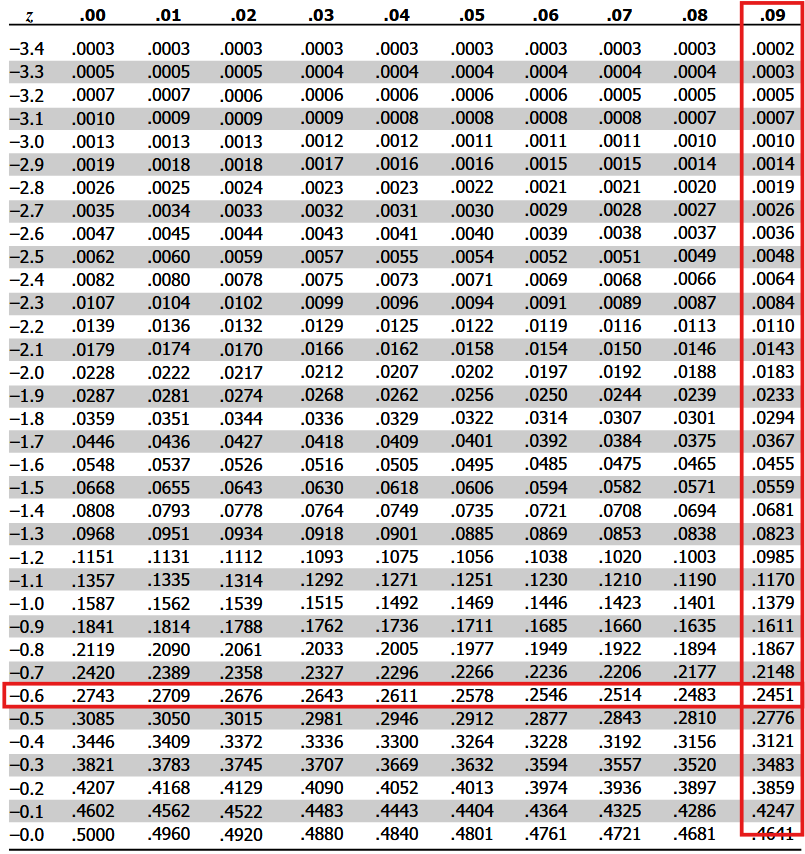

Assim a probabilidade de encontrar um paciente com glicose abaixo de 100 é: 24,51%

#### Estudo 2: Probabilidade de Diabetes

O diagnóstico de diabetes é geralmente considerado para valores acima de 126 mg/dL.

Versão Não Padronizada: $P(X > 140)$

###### Cálculo do Z-Score: $z = (\frac{140 - 121.51}{31.3})$

In [10]:
calculate_zscore(140)

0.59

In [11]:
1 - 0.7224

0.27759999999999996

Versão Padronizada: $P(X > 140) => P(Z > 0.59) = 1 - 0.7224 = 0.2776$

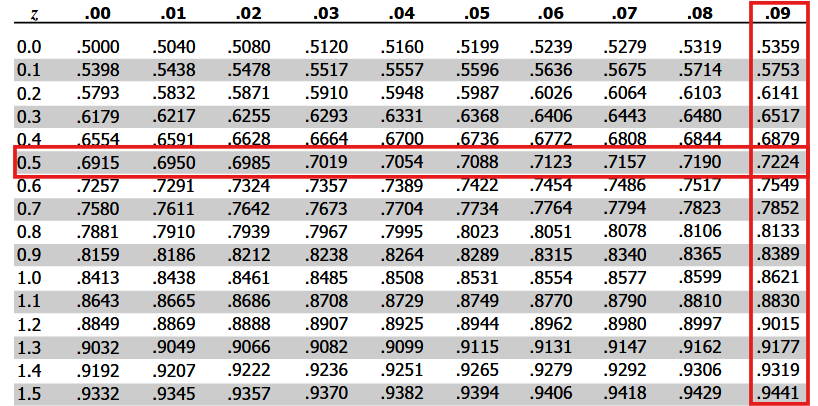

Assim a probabilidade de encontrar um paciente com glicose acima de 140 é: 27,76%

#### Estudo 3: Probabilidade de Pré-Diabetes

A faixa de risco (pré-diabetes) situa-se entre 100 mg/dL e 140 mg/dL.

Versão Não Padronizada: $P(100 < X < 140)$

###### Cálculo do Z-Score:
$z = (\frac{100 - 121.51}{31.3})$

$z = (\frac{140 - 121.51}{31.3})$

Ambos calculados anteriormente.

In [12]:
0.7224 - 0.2451

0.47730000000000006

Versão Padronizada: $P(100 < X < 140) => P(0.69 < Z < 0.59) = 0.7224 - 0.2451 = 0.4773$

Assim a probabilidade de encontrar um paciente com glicose entre 100 e 140 é: 47,73%

### Questão C - Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.


#### Contexto

##### Na simulação mostrada no slide, com uma probabilidade de sucesso de s=0.95 e 242485 amostras de 50 lançamentos, o evento 48 caras era o resultado mais frequente, com probabilidade de 26.1%. Conforme a figura abaixo:

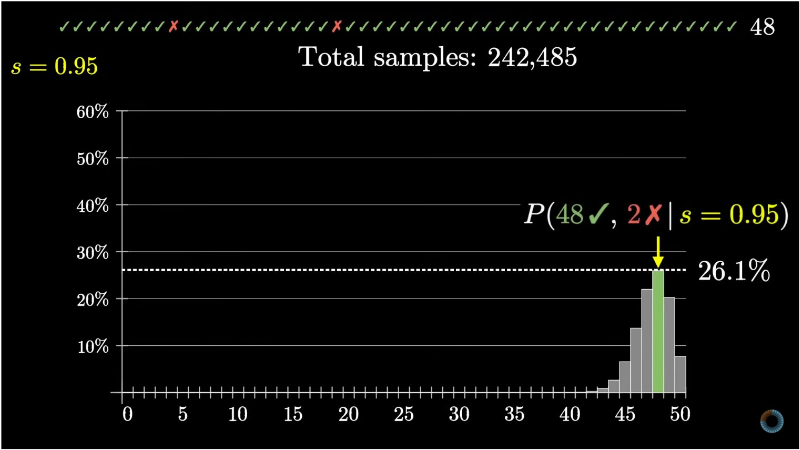

#### Simulação S = 0.80

##### Abaixo, foi refeita a mesma simulação do evento de 48 caras de 242485 amostras com 50 lançamentos, porém agora com s = 0.80

In [16]:
n_size = 242485
np.random.seed(42)
amostras_artificiais = np.random.binomial(n=50, p=0.80, size=n_size)

In [26]:
np.sum(amostras_artificiais == 48) / n_size

np.float64(0.0010268676412973998)

In [17]:
fig = px.histogram(x=amostras_artificiais, histnorm='probability density', title="Histograma da distribuição binomial (s = 0.80, n = 50 lançamentos)", labels={'x': 'Número de caras'})
fig.update_layout(xaxis={'range':[0,50]})
fig.show()

#### Cálculo Explícito

##### Para fazer o cáculo explicitamente da probabilidade, foi utilizada as equações dadas no slide. São as duas equações abaixo:

<div align="center">

$$
P(X = k) = \binom{n}{k} p^{k} (1 - p)^{\,n-k}
$$

**Equação 3: Função de Probabilidade da Distribuição Binomial**

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

**Equação 4: Fórmula da Combinatória (Coeficiente Binomial)**

</div>

Substituindo os valores (n=50, k=48, p=0.80), temos:

$$
P(X = 48) = \frac{50!}{48!(50-48)!} . 0.80^{48} . (1 - 0.80)^{\,50-48}
$$

In [25]:
n = 50
k = 48
s = 0.80

fatorial_n = math.factorial(n)
fatorial_k = math.factorial(k)
fatorial_nk = math.factorial(n - k)

combinacao = fatorial_n / (fatorial_k * fatorial_nk)
print(f"Resultado Combinação (Formas de tirar 48 caras em 50 lançamentos): {int(combinacao)}")

probabilidade = combinacao * (s ** k) * ((1 - s) ** (n - k))
print(f"Probabilidade P(X = 48): {probabilidade}")

Resultado Combinação (Formas de tirar 48 caras em 50 lançamentos): 1225
Probabilidade P(X = 48): 0.001092736514728003


#### Discussão da Comparação dos Resultados

O cálculo explícito via função de probabilidade resultou em aproximadamente 0.109% (0.001092...), valor extremamente próximo à frequência de 0.103% (0.001026...) observada na simulação. Também vemos o impacto grande da alteração do parâmetro s: ao reduzir a chance de sucesso individual de 0.95 para 0.80, o evento de obter 48 caras, que anteriormente representava o evento mais frequente com 26.1% de probabilidade, foi deslocado para a cauda extrema da curva, tornando-se um evento estatisticamente raro.

#### Histograma das 10 primeiras amostras geradas:

In [18]:
for num in list(range(1, 11)):
  amostra = amostras_artificiais[:num]
  fig = px.histogram(x=amostra, title=f'Amostra {num} - {str(amostra)}', histnorm='probability density', labels={'x': 'Número de caras'}, nbins=10)
  fig.update_layout(width=700, height=500, xaxis={'range':[0, 50]})
  fig.show()